#Spam SMS Classifier

**Setting a random seed for Reproducibility**

In [ ]:
seed = 42

**Importing required libraries and methods**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

**Reading the `.csv` file**

In [ ]:
sms = '/content/Data/spam.csv'
df = pd.read_csv(sms, encoding = 'latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


###Exploratory data analysis and data Pre-*processing*

In [ ]:
df.shape

(5572, 5)

**Checking for null fields**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


**Dropping the unwanted coulmns**

In [ ]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Label encoding the target v1 coulmn: 0 is non spam and 1 is spam**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['v1'] = le.fit_transform(df['v1'])
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['v1'].value_counts()

v1
0    4825
1     747
Name: count, dtype: int64

**Separating features and target**

In [ ]:
X = df['v2']
y = df['v1']
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

**Making a train, validation and test split**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_, y_train, y_ = train_test_split(X, df['v1'], test_size = 0.4, random_state = seed)
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size = 0.5, random_state = seed)
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape,  X_test.shape, y_test.shape

((3343,), (3343,), (1114,), (1114,), (1115,), (1115,))

**Vectorizing the text column**

In [ ]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)
X_train_vector = vectorizer.transform(X_train)
X_cv_vector = vectorizer.transform(X_cv)
X_test_vector = vectorizer.transform(X_test)
X_train_vector.shape, X_cv_vector.shape, X_test_vector.shape

((3343, 6663), (1114, 6663), (1115, 6663))

**Checking the vocabulary**

In [ ]:
print(vectorizer.vocabulary_)

{'need': 4062, 'you': 6618, 'to': 5938, 'be': 1088, 'in': 3134, 'my': 4008, 'strong': 5576, 'arms': 898, 'haha': 2835, 'heard': 2907, 'that': 5827, 'text': 5807, 'me': 3779, 'when': 6421, 're': 4788, 'around': 901, 'what': 6417, 'love': 3619, 'hear': 2906, 'see': 5117, 'sundayish': 5649, 'then': 5843, 'pete': 4442, 'is': 3225, 'this': 5864, 'your': 6624, 'phone': 4455, 'still': 5540, 'its': 3243, 'jenny': 3286, 'from': 2614, 'college': 1636, 'and': 810, 'leanne': 3474, 'are': 883, 'up': 6153, 'now': 4163, 'doing': 2059, 'nothing': 4153, 'not': 4150, 'having': 2894, 'dinner': 1999, 'us': 6182, 'jamster': 3267, 'get': 2689, 'free': 2583, 'wallpaper': 6317, 'heart': 2908, '88888': 592, 'apply': 861, '16': 259, 'only': 4252, 'help': 2926, 'call': 1376, '08701213186': 63, 'sure': 5666, 'yet': 6607, 'trying': 6046, 'hold': 2980, 'of': 4205, 'him': 2955, 'cheers': 1517, 'for': 2547, 'the': 5832, 'message': 3821, 'zogtorius': 6648, 'iåõve': 3258, 'been': 1108, 'staring': 5508, 'at': 945, 'an':

In [ ]:
vectorizer.get_feature_names_out()

array(['00', '000', '008704050406', ..., 'ûïharry', 'ûò', 'ûówell'],
      dtype=object)

**Converting sparse matrix X to numpy array**

In [ ]:
X_train_vector = X_train_vector.toarray()
X_cv_vector = X_cv_vector.toarray()
X_test_vector = X_test_vector.toarray()

### Multinomial Naive Bayes

**Tuning the hyperparameter alpha**

In [ ]:
alpha_list = [0.00001, 0.0001, 0.001, 0.1, 1]

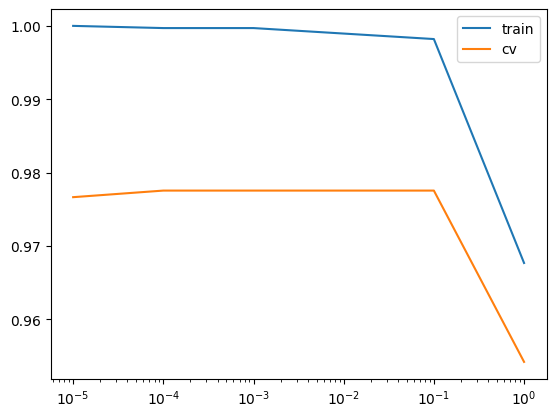

In [ ]:
train_acc = []
cv_acc = []
for alpha in alpha_list:
  mnb = MultinomialNB(alpha = alpha)
  mnb.fit(X_train_vector, y_train)

  y_train_pred = mnb.predict(X_train_vector)
  y_cv_pred = mnb.predict(X_cv_vector)

  train_acc.append(accuracy_score(y_train, y_train_pred))
  cv_acc.append(accuracy_score(y_cv, y_cv_pred))

plt.plot(alpha_list, train_acc, label = 'train')
plt.plot(alpha_list, cv_acc, label = 'cv')
plt.xscale('log')
plt.legend()
plt.show()

**We see that at `alpha = 0.1`, weare getting high train and cross validaion accuracy**

**Fitting the model**

In [ ]:
mnb = MultinomialNB(alpha = 0.1)
mnb.fit(X_train_vector, y_train)

MultinomialNB(alpha=0.1)

In [ ]:
y_test_pred = mn_nb.predict(X_test_vector)
accuracy_score(y_test, y_test_pred)

0.9596412556053812

**We get an accuracy of 95.9% with multinomial naive bayes**

### Logistic Regression

In [ ]:
X_train_vector_lr = np.concatenate((X_train_vector, X_cv_vector))
y_train_lr = np.concatenate((y_train, y_cv))
X_train_vector_lr.shape, y_train_lr.shape

((4457, 6663), (4457,))

**Implementing a Grid search for hyperparameters C and penalty**

In [ ]:
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2', 'elasticnet']}

In [ ]:
search = GridSearchCV(LogisticRegression(random_state = seed), parameters,  n_jobs = -1)
search.fit(X_train_vector_lr, y_train_lr)
print(search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
70 fits failed out of a total of 105.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

{'C': 1000, 'penalty': 'l2'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
search.best_params_

{'C': 1000, 'penalty': 'l2'}

**Fitting the model with best parameters: `C = 1000` and `penalty = 'l2'`**

In [ ]:
logr = LogisticRegression(max_iter = 500, C = 1000, penalty = 'l2', random_state = seed)
logr.fit(X_train_vector_lr, y_train_lr)

LogisticRegression(C=1000, max_iter=500, random_state=42)

In [ ]:
y_test_pred = logr.predict(X_test_vector)
accuracy_score(y_test, y_test_pred)

0.9856502242152466

**We get an accuracy of 98.5% with Logistic Regression**

### Support Vector Machine

**Tuning the hyperparameter C**

In [ ]:
C_list = [0.1, 1, 10, 100, 1000]

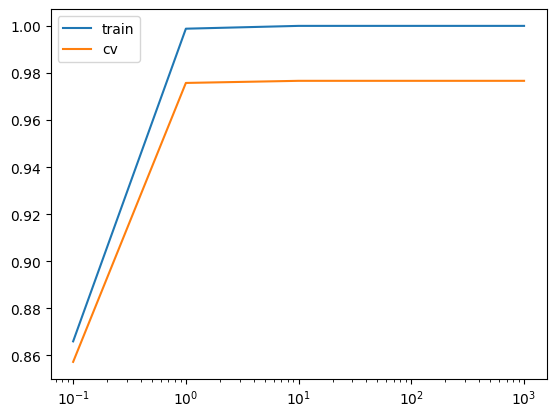

In [ ]:
train_acc = []
cv_acc = []
for C in C_list:
  svc = SVC(C = C, random_state=seed)
  svc.fit(X_train_vector, y_train)
  train_acc.append(svc.score(X_train_vector, y_train))
  cv_acc.append(svc.score(X_cv_vector, y_cv))

plt.plot(C_list, train_acc, label = 'train')
plt.plot(C_list, cv_acc, label = 'cv')
plt.xscale('log')
plt.legend()
plt.show()

**We observe that at `C = 1` we get high train as well as validation accuracy**

**Implementing a Grid search for gamma and kernel**

In [ ]:
parameters = {'gamma' : [1, 0.1, 0.01, 0.001, 0.0001], 'kernel' : ['rbf', 'poly', 'sigmoid', 'linear']}

In [ ]:
search = GridSearchCV(SVC(random_state = seed, C = 1), parameters, n_jobs = -1)
search.fit(X_train_vector, y_train)

GridSearchCV(estimator=SVC(C=1, random_state=42), n_jobs=-1,
             param_grid={'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']})

In [ ]:
print(search.best_params_)

{'gamma': 1, 'kernel': 'sigmoid'}


**Fitting the model with best parameters: `C = 1`, `gamma = 1` and `kernel = 'sigmoid'`**

In [ ]:
svc = SVC(C = 1, gamma = 1, kernel = 'sigmoid', random_state = seed)
svc.fit(X_train_vector, y_train)

SVC(C=1, gamma=1, kernel='sigmoid', random_state=42)

In [ ]:
y_test_pred = svc.predict(X_test_vector)
accuracy_score(y_test, y_test_pred)

0.9829596412556054

**We get an accuracy of 98.2% with SVC**